In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('4stantions.csv', parse_dates=[3,4])
data.drop(['Unnamed: 0'], axis=1, inplace=True)
#data.astype({'operation_st_esr':'int64', 'car_number':'int64'}).dtypes
data.operation_st_esr = data.operation_st_esr.astype(int)
data.car_number=data.car_number.astype(int)
data.head()

,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration
0,943803,24562753,2020-07-14 17:11:00,2020-07-21 19:56:00,35.566667,135.183333,170.750000
1,943803,29196490,2020-07-18 05:52:00,2020-07-25 07:03:00,0.000000,169.183333,169.183333
2,943803,29501491,2020-07-16 15:55:00,2020-07-25 07:03:00,0.000000,207.133333,207.133333
3,943803,29649290,2020-07-18 05:52:00,2020-07-25 07:03:00,0.000000,169.183333,169.183333
4,943803,29649399,2020-07-13 16:37:00,2020-07-16 07:58:00,42.383333,20.966667,63.350000


In [16]:
data.operation_st_esr.value_counts()

967600    19332
946801     2003
943803      116
954102      111
Name: operation_st_esr, dtype: int64

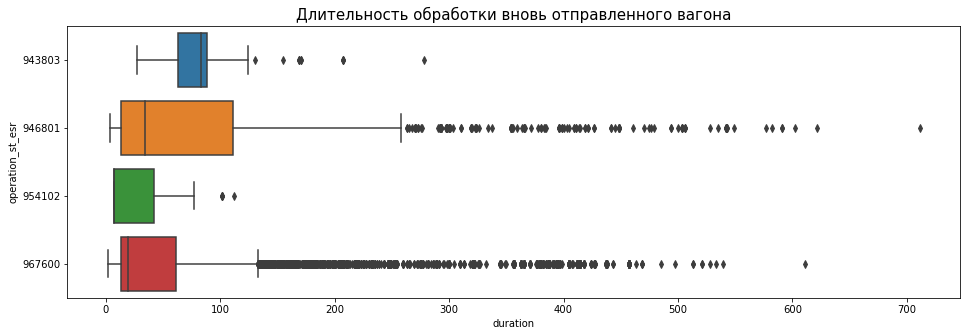

In [21]:
plt.figure(figsize = (16,5))
sns.boxplot(x= 'duration', y = 'operation_st_esr', data=data, orient='h')
plt.title('Длительность обработки вновь отправленного вагона', fontsize=15)
plt.show();

In [24]:
data['unload_only'] = data['1Xduration'].apply(lambda x: 1 if x < 0.5 else 0)
data['load_only'] = data['2Xduration'].apply(lambda x: 1 if x < 0.5 else 0 )
data.head()

,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration,unload_only,load_only
0,943803,24562753,2020-07-14 17:11:00,2020-07-21 19:56:00,35.566667,135.183333,170.750000,0,0
1,943803,29196490,2020-07-18 05:52:00,2020-07-25 07:03:00,0.000000,169.183333,169.183333,1,0
2,943803,29501491,2020-07-16 15:55:00,2020-07-25 07:03:00,0.000000,207.133333,207.133333,1,0
3,943803,29649290,2020-07-18 05:52:00,2020-07-25 07:03:00,0.000000,169.183333,169.183333,1,0
4,943803,29649399,2020-07-13 16:37:00,2020-07-16 07:58:00,42.383333,20.966667,63.350000,0,0


In [64]:
data_uo = data.loc[ data['unload_only']==1]
print(data_uo.size)
data_uo.head()

167751


,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration,unload_only,load_only
1,943803,29196490,2020-07-18 05:52:00,2020-07-25 07:03:00,0.0,169.183333,169.183333,1,0
2,943803,29501491,2020-07-16 15:55:00,2020-07-25 07:03:00,0.0,207.133333,207.133333,1,0
3,943803,29649290,2020-07-18 05:52:00,2020-07-25 07:03:00,0.0,169.183333,169.183333,1,0
14,943803,42662957,2020-07-16 15:55:00,2020-07-25 07:03:00,0.0,207.133333,207.133333,1,0
20,943803,43038330,2020-07-18 05:52:00,2020-07-25 07:03:00,0.0,169.183333,169.183333,1,0


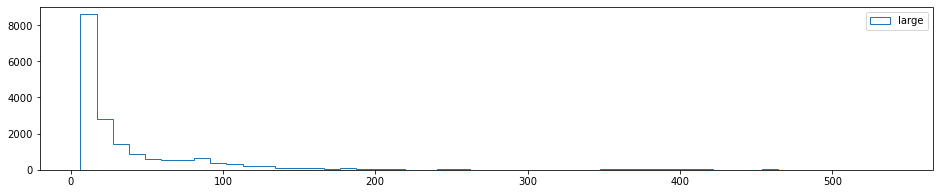

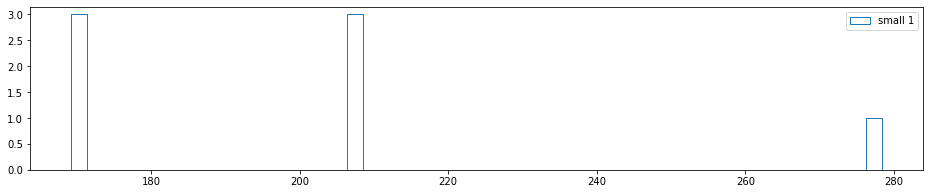

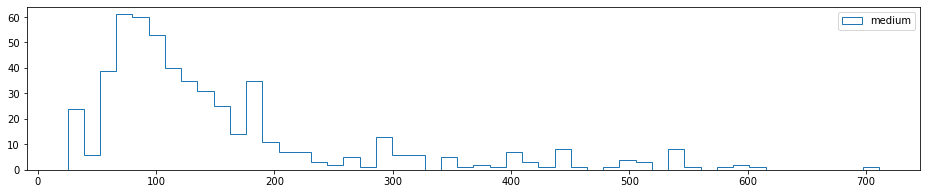

In [36]:
plt.figure(figsize=(16,3))
plt.hist(data_uo.query('operation_st_esr==967600').duration,bins=50,histtype='step',label='large')
plt.legend(loc='best')
plt.figure(figsize=(16,3))
# plt.hist(data_uo.query('operation_st_esr==954102').duration,bins=50,histtype='step',label='small 0')
plt.hist(data_uo.query('operation_st_esr==943803').duration,bins=50,histtype='step',label='small 1')
plt.legend(loc='best')
plt.figure(figsize=(16,3))
plt.hist(data_uo.query('operation_st_esr==946801').duration,bins=50,histtype='step',label='medium')
plt.legend(loc='best');
#plt.title('Распределение длительности операций освобождения вагона')

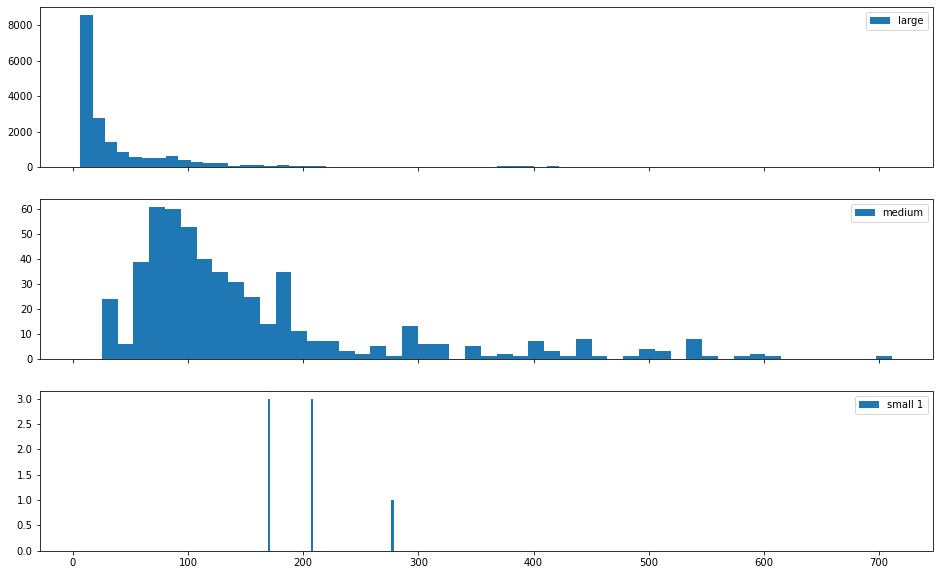

In [68]:
#fig = plt.figure(figsize=(16,10))
# fig.add_subplot(3,1,1)
fig, axs = plt.subplots(3, sharex=True) 
#fig=fig.figure(figsize=(16,10))
fig.set_figheight(10)
fig.set_figwidth(16)
# fig.suptitle('Операции освобождения вагонов')
axs[0].hist(data_uo.query('operation_st_esr==967600').duration,bins=50,histtype='stepfilled',label='large')
axs[0].legend(loc='best')
axs[1].hist(data_uo.query('operation_st_esr==946801').duration,bins=50,histtype='stepfilled',label='medium')
axs[1].legend(loc='best');
# plt.hist(data_uo.query('operation_st_esr==954102').duration,bins=50,histtype='stepfilled',label='small 0')
axs[2].hist(data_uo.query('operation_st_esr==943803').duration,bins=50,histtype='stepfilled',label='small 1')
axs[2].legend(loc='best');
#plt.title('Распределение длительности операций освобождения вагона')

In [65]:
data_lo = data.loc[ data['load_only']==1]
print(data_lo.size)
data_lo.head()

13194


,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration,unload_only,load_only
116,946801,24614307,2020-07-05 21:22:00,2020-07-06 06:44:00,9.366667,0.0,9.366667,0,1
118,946801,28034189,2020-07-05 23:25:00,2020-07-07 09:38:00,34.216667,0.0,34.216667,0,1
119,946801,28035848,2020-07-04 07:41:00,2020-07-04 19:07:00,11.433333,0.0,11.433333,0,1
120,946801,28068708,2020-07-05 06:45:00,2020-07-15 06:01:00,239.266667,0.0,239.266667,0,1
121,946801,28074003,2020-07-05 21:22:00,2020-07-12 02:12:00,148.833333,0.0,148.833333,0,1


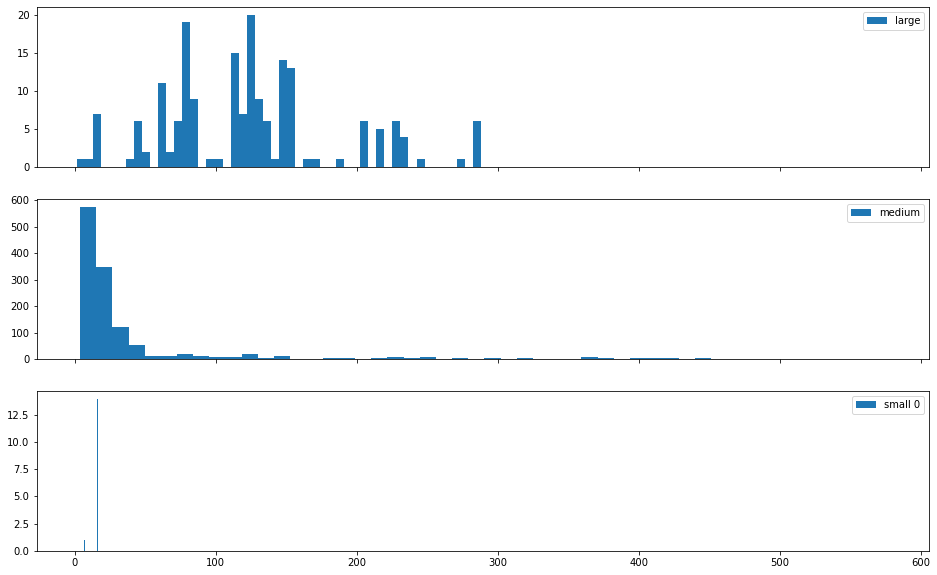

In [67]:
#fig = plt.figure(figsize=(16,10))
# fig.add_subplot(3,1,1)
fig, axs = plt.subplots(3, sharex=True) 
#fig=fig.figure(figsize=(16,10))
fig.set_figheight(10)
fig.set_figwidth(16)
# fig.suptitle('Операции загрузки пустого вагонов')
axs[0].hist(data_lo.query('operation_st_esr==967600').duration,bins=50,histtype='stepfilled',label='large')
axs[0].legend(loc='best')
axs[1].hist(data_lo.query('operation_st_esr==946801').duration,bins=50,histtype='stepfilled',label='medium')
axs[1].legend(loc='best');
axs[2].hist(data_lo.query('operation_st_esr==954102').duration,bins=50,histtype='stepfilled',label='small 0')
#axs[2].hist(data_lo.query('operation_st_esr==943803').duration,bins=50,histtype='stepfilled',label='small 1')
axs[2].legend(loc='best');
#plt.title('Распределение длительности операций освобождения вагона')

In [60]:
data_1 = data.loc[ data['load_only']==0]
data_ul = data_1[data_1['unload_only']==0]
print(data_ul.size)
data_ul.head()

13113


,operation_st_esr,car_number,start3_date,end4_date,1Xduration,2Xduration,duration,unload_only,load_only
0,943803,24562753,2020-07-14 17:11:00,2020-07-21 19:56:00,35.566667,135.183333,170.750000,0,0
4,943803,29649399,2020-07-13 16:37:00,2020-07-16 07:58:00,42.383333,20.966667,63.350000,0,0
5,943803,42026583,2020-07-15 04:29:00,2020-07-20 03:17:00,89.450000,29.350000,118.800000,0,0
6,943803,42434910,2020-07-13 16:37:00,2020-07-16 07:33:00,20.033333,42.900000,62.933333,0,0
7,943803,42452136,2020-07-18 05:52:00,2020-07-21 19:56:00,28.750000,57.316667,86.066667,0,0


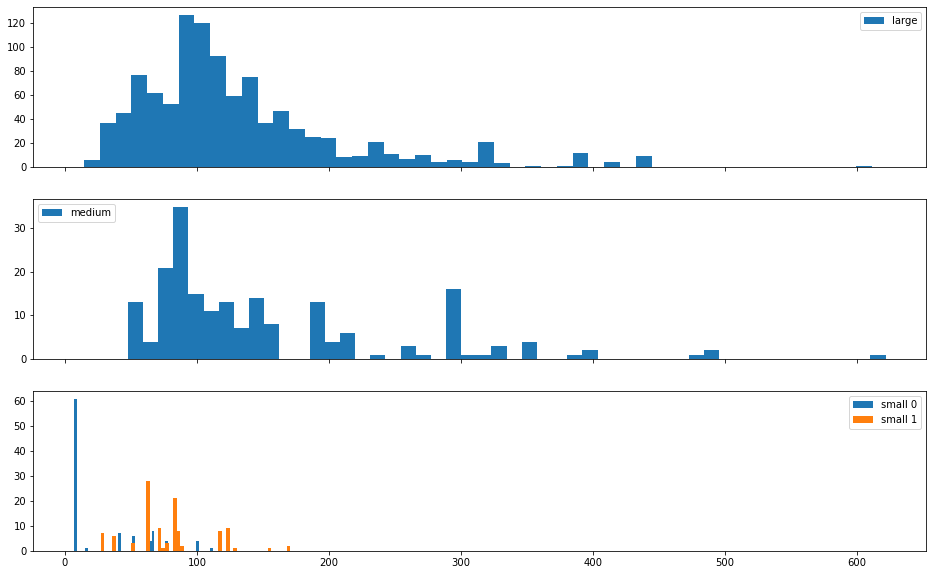

In [66]:
fig, axs = plt.subplots(3, sharex=True) 
#fig=fig.figure(figsize=(16,10))
fig.set_figheight(10)
fig.set_figwidth(16)
# fig.suptitle('Операции загрузки пустого вагонов')
axs[0].hist(data_ul.query('operation_st_esr==967600').duration,bins=50,histtype='stepfilled',label='large')
axs[0].legend(loc='best')
axs[1].hist(data_ul.query('operation_st_esr==946801').duration,bins=50,histtype='stepfilled',label='medium')
axs[1].legend(loc='best');
axs[2].hist(data_ul.query('operation_st_esr==954102').duration,bins=50,histtype='stepfilled',label='small 0')
axs[2].hist(data_ul.query('operation_st_esr==943803').duration,bins=50,histtype='stepfilled',label='small 1')
axs[2].legend(loc='best');
#plt.title('Распределение длительности операций освобождения вагона')